# 概要
位置情報を地図にマッピングしてみたいなと思って、調べていたらfoliumを見つけた。<br>
早速使ってみる。

下記コマンドでインストール<br>
    pip install folium branca jinja2 requests six



[参考URL]<br>
[folium Github](https://github.com/python-visualization/folium)<br>
[folium 事始め](https://qiita.com/pork_steak/items/f551fa09794831100faa)


In [2]:
import os
import folium
import pandas as pd
from folium import plugins
print( "folium version is {}".format(folium.__version__) )
location_tokyo = [35,139]

folium version is 0.9.1


地図の中心点としたい場所の位置の緯度・経度データを指定

In [3]:
m = folium.Map(location=location_tokyo)
m.save('original.html')
m

## 地図タイルの設定

- “OpenStreetMap”
- “Mapbox Bright” (Limited levels of zoom for free tiles)
- “Mapbox Control Room” (Limited levels of zoom for free tiles)
- “Stamen” (Terrain, Toner, and Watercolor)

下記は組込みでタイル指定が可能なものですが、API Keyが必要です。
- “Cloudmade” (Must pass API key)
- “Mapbox” (Must pass API key)
- “CartoDB” (positron and dark_matter)

In [8]:
copyright_st = '&copy; ' \
            'Map tiles by <a href="http://stamen.com">Stamen Design</a>,' \
            ' under <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>.' \
            'Data by <a href="http://openstreetmap.org">OpenStreetMap</a>,' \
            'under <a href="http://www.openstreetmap.org/copyright">ODbL</a>.'


m = folium.Map(
    location=location_tokyo,
    attr=copyright_st,
    tiles='Stamen Toner',
    zoom_start=5
)
m.save('StamenToner.html')

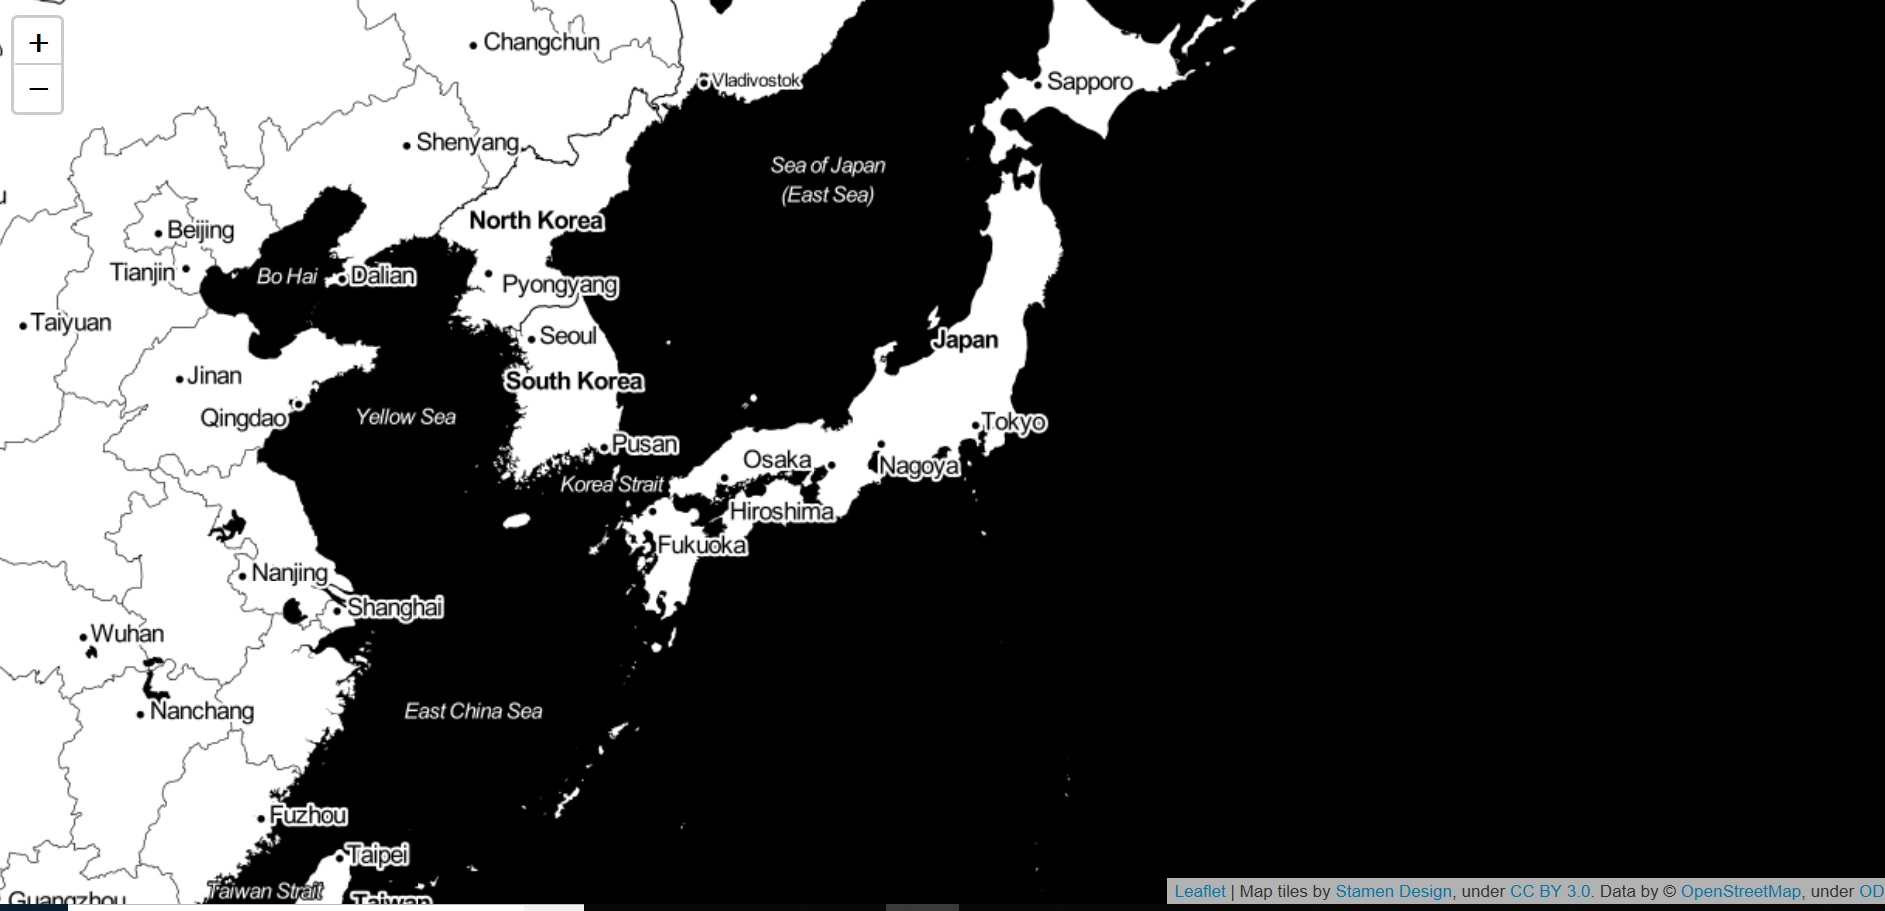

zoom_startは小数点以下は四捨五入されてるようだ。

# マーカーの設定
ポップアップの設定も出来る。マーカーをクリックすると文言が表示される。

In [10]:
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)

m.save('Marker.html')

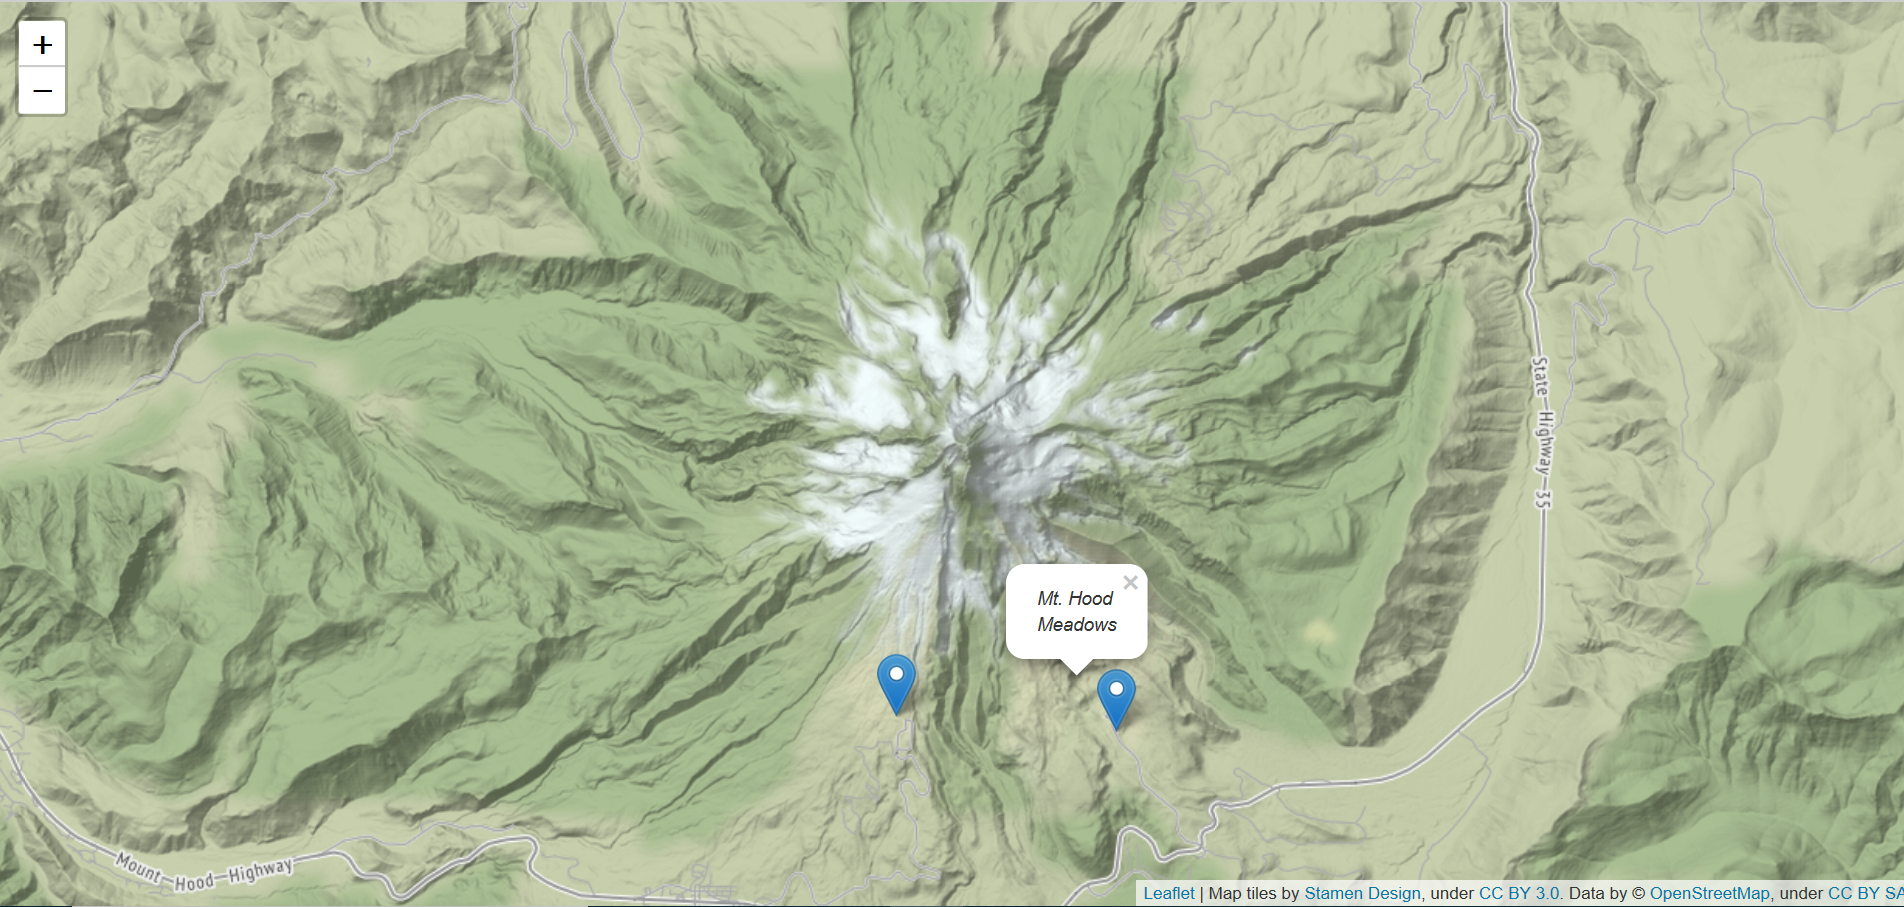

In [12]:
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup='Timberline Lodge',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[45.3300, -121.6823],
    popup='Some Other Location',
    icon=folium.Icon(color='red', icon='andoroid')
).add_to(m)

m.save('ColorMarker.html')

マーカーのアイコンとカラーも設定できる

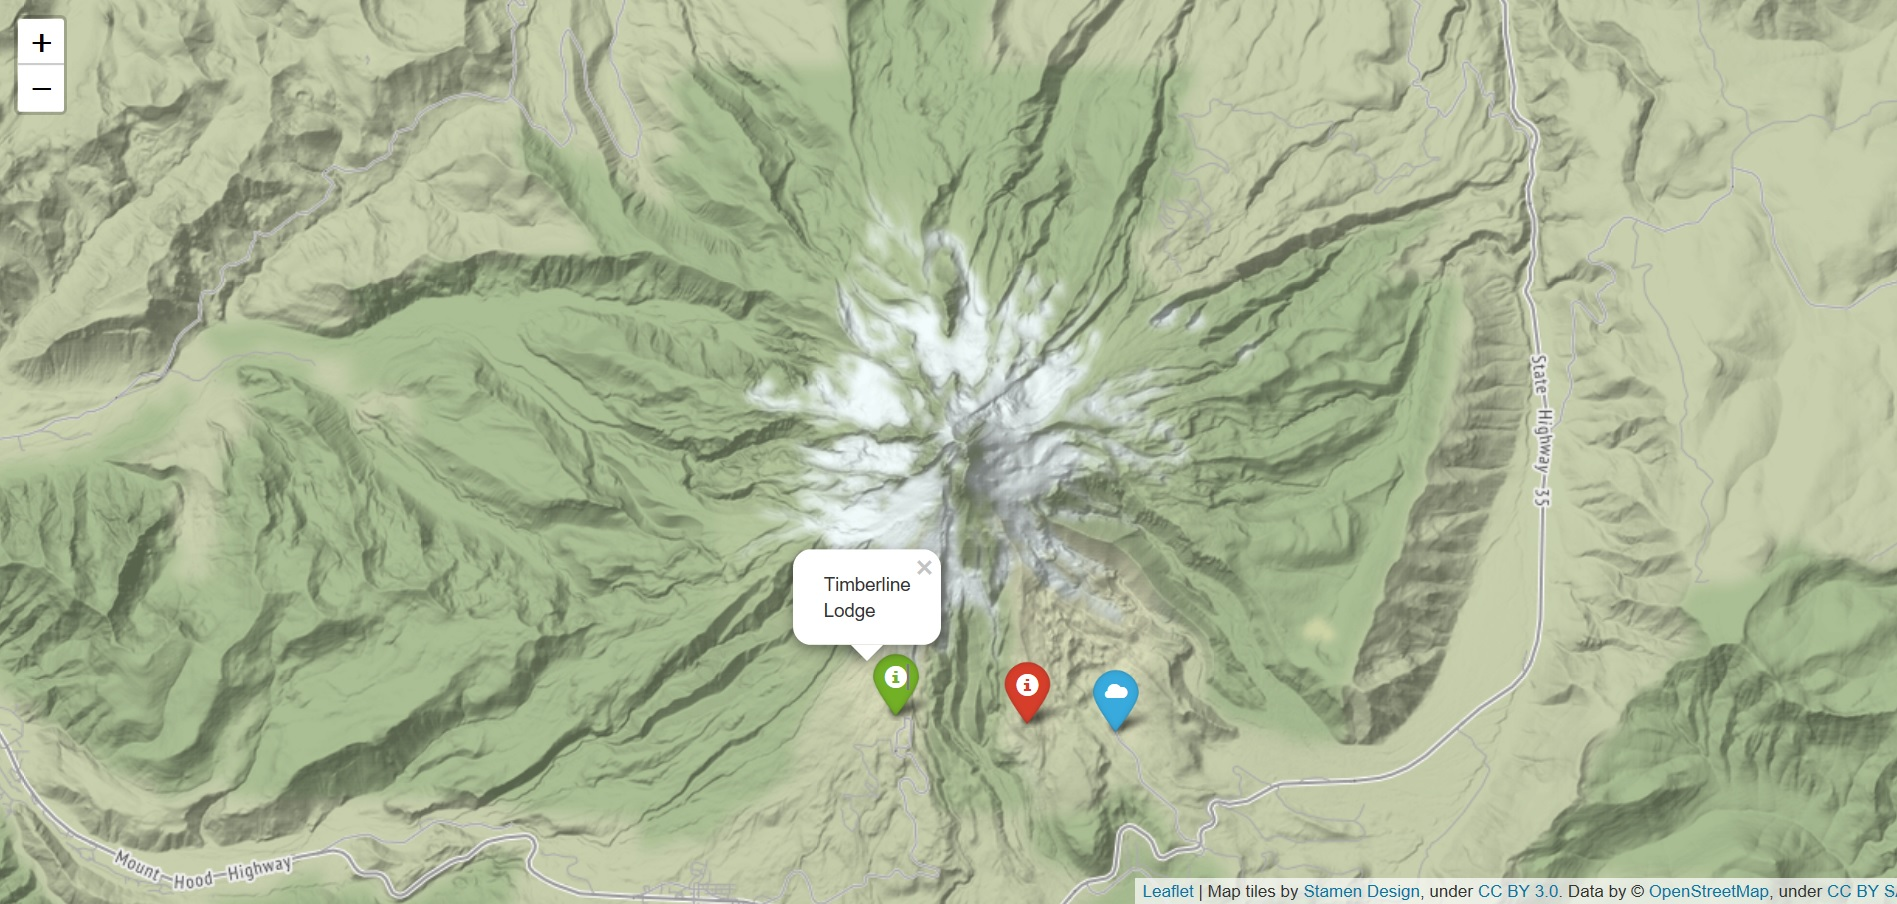

円形マーカー。地震の時によくみるやつ。

In [13]:
m = folium.Map(
    location=[45.5236, -122.6750],
    tiles='Stamen Toner',
    zoom_start=13
)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)


m.save('CircleMarker.html')

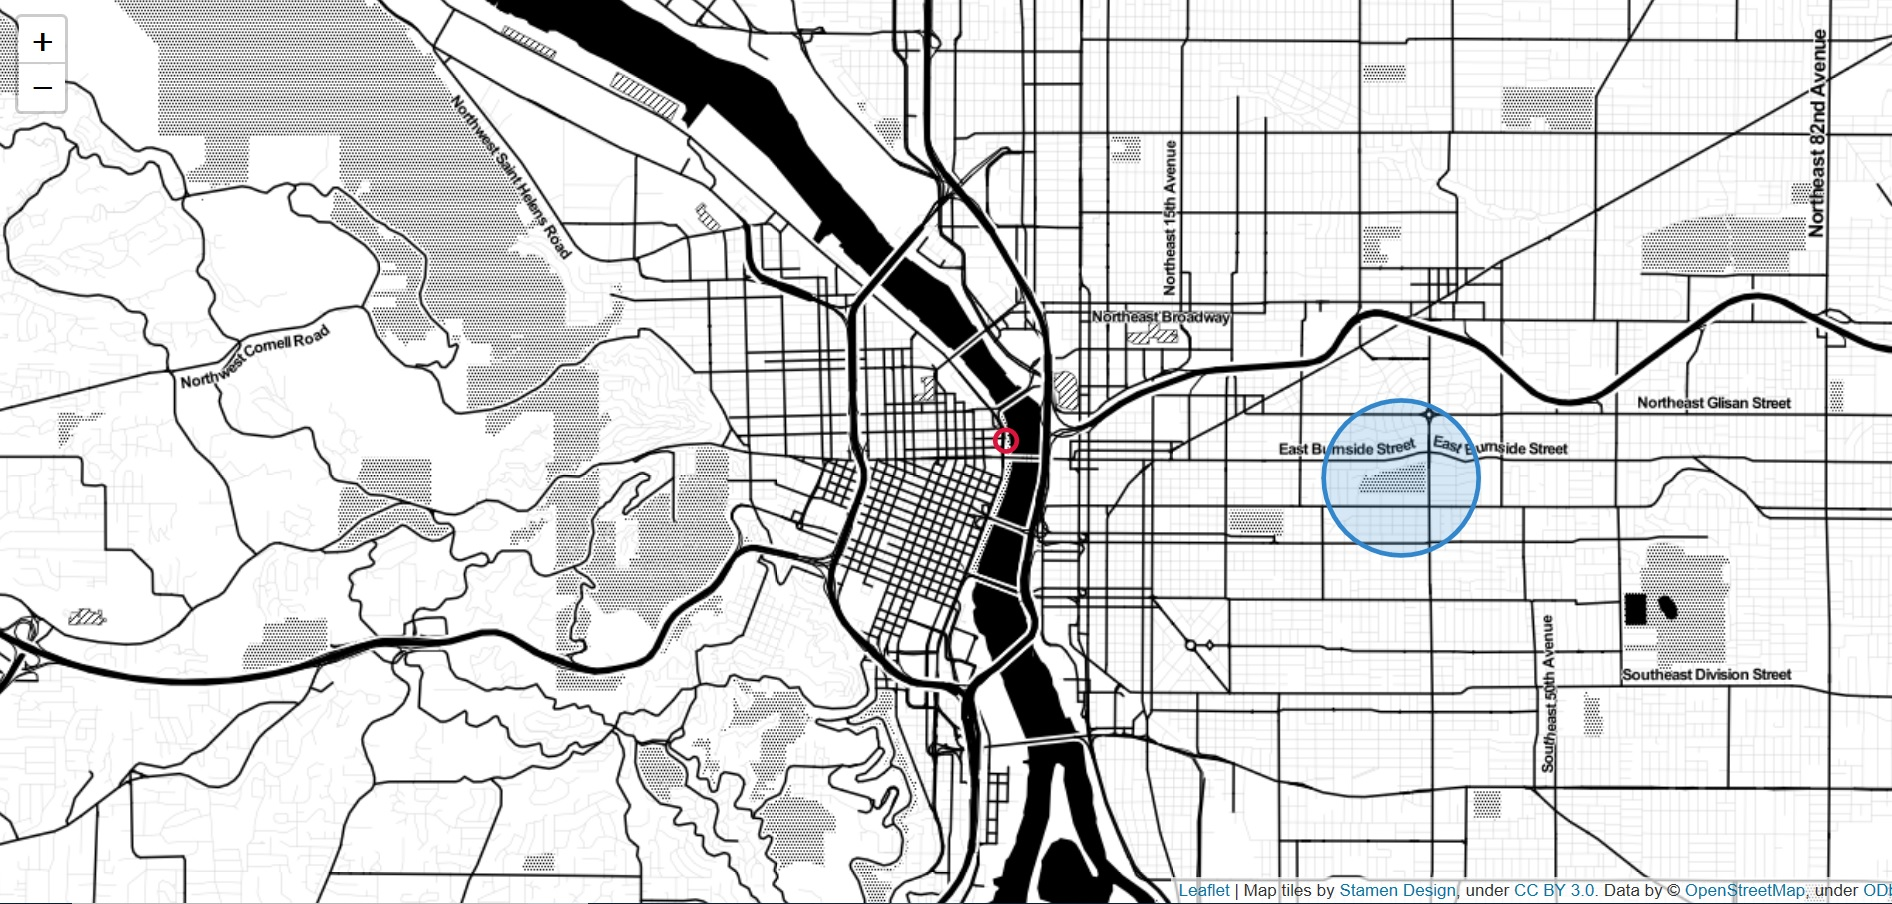

クリックした点の緯度経度をポップアップ表示します

In [15]:
m = folium.Map(
    location=[46.1991, -122.1889],
    tiles='Stamen Terrain',
    zoom_start=13
)

m.add_child(folium.LatLngPopup())
m.save('LatLngPopup.html')

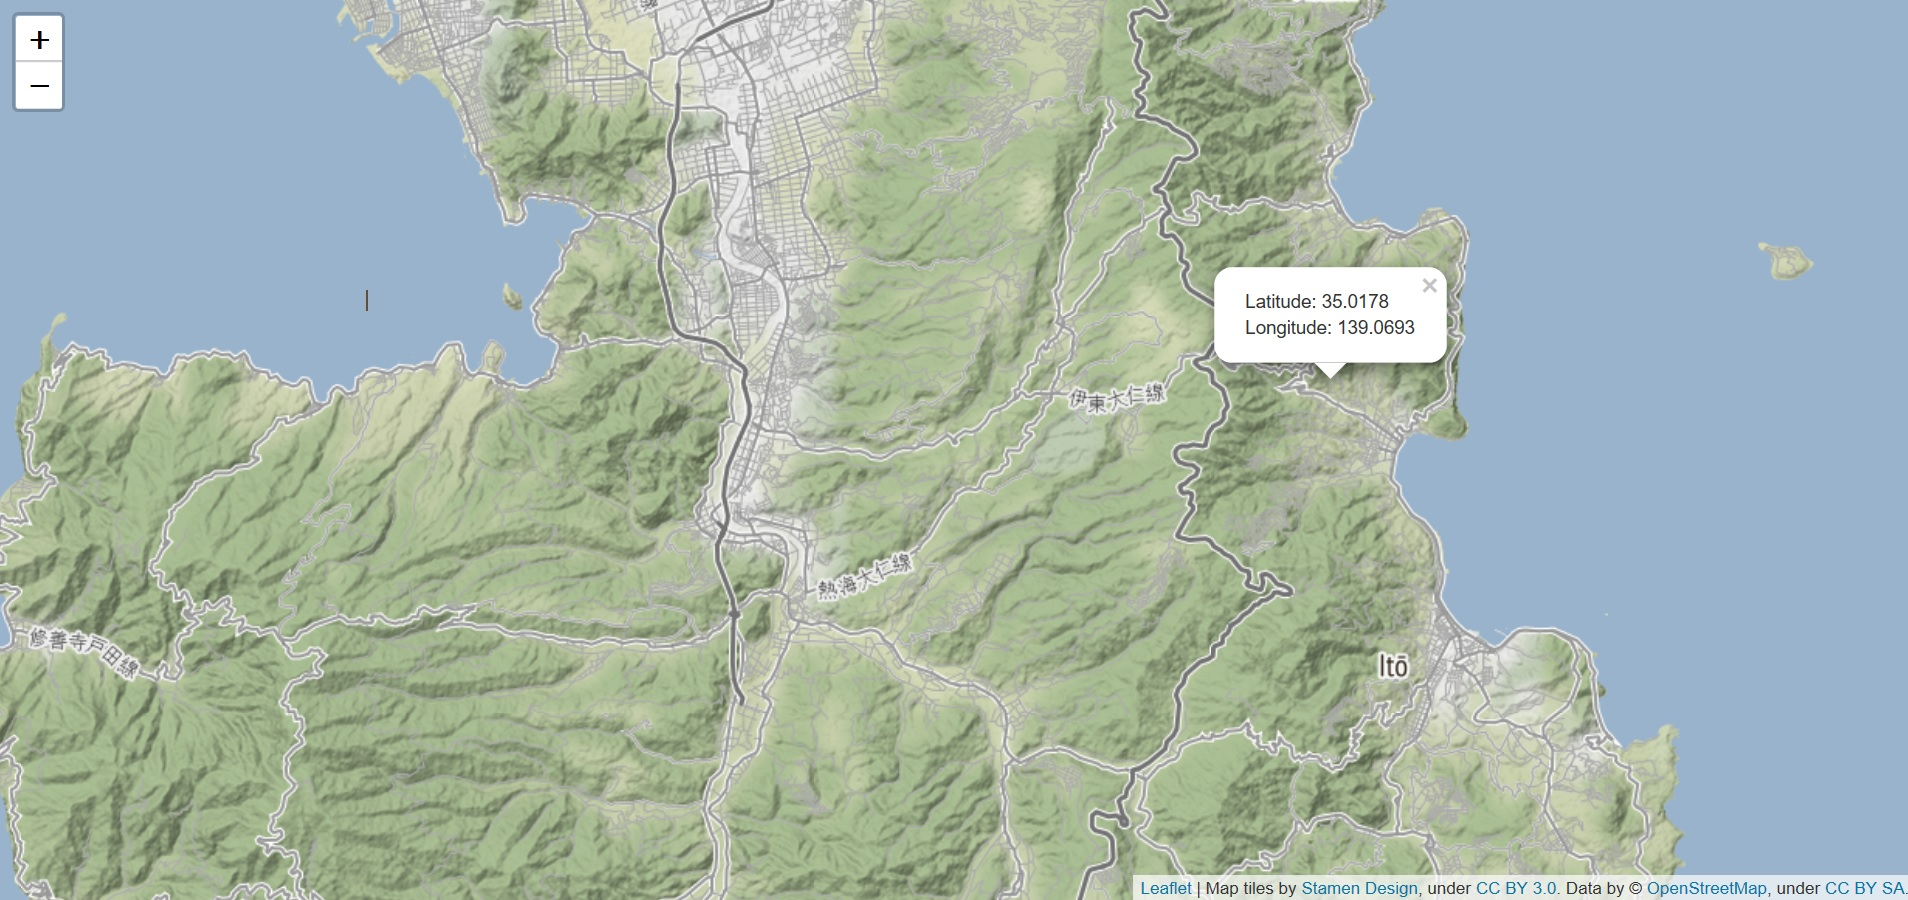

クリックしたポイントにマーカーを打つことも可<br>
Markerを数千個打つと固まるとの報告もあり。上限値を設けられれば設けた方が良い。

In [19]:
m = folium.Map(
    location=[46.8527, -121.7649],
    tiles='Stamen Terrain',
    zoom_start=13
)

folium.Marker(
    [46.8354, -121.7325],
    popup='Camp Muir'
).add_to(m)

m.add_child(folium.ClickForMarker(popup='Waypoint'))
m.save('ClickForMarke.html')

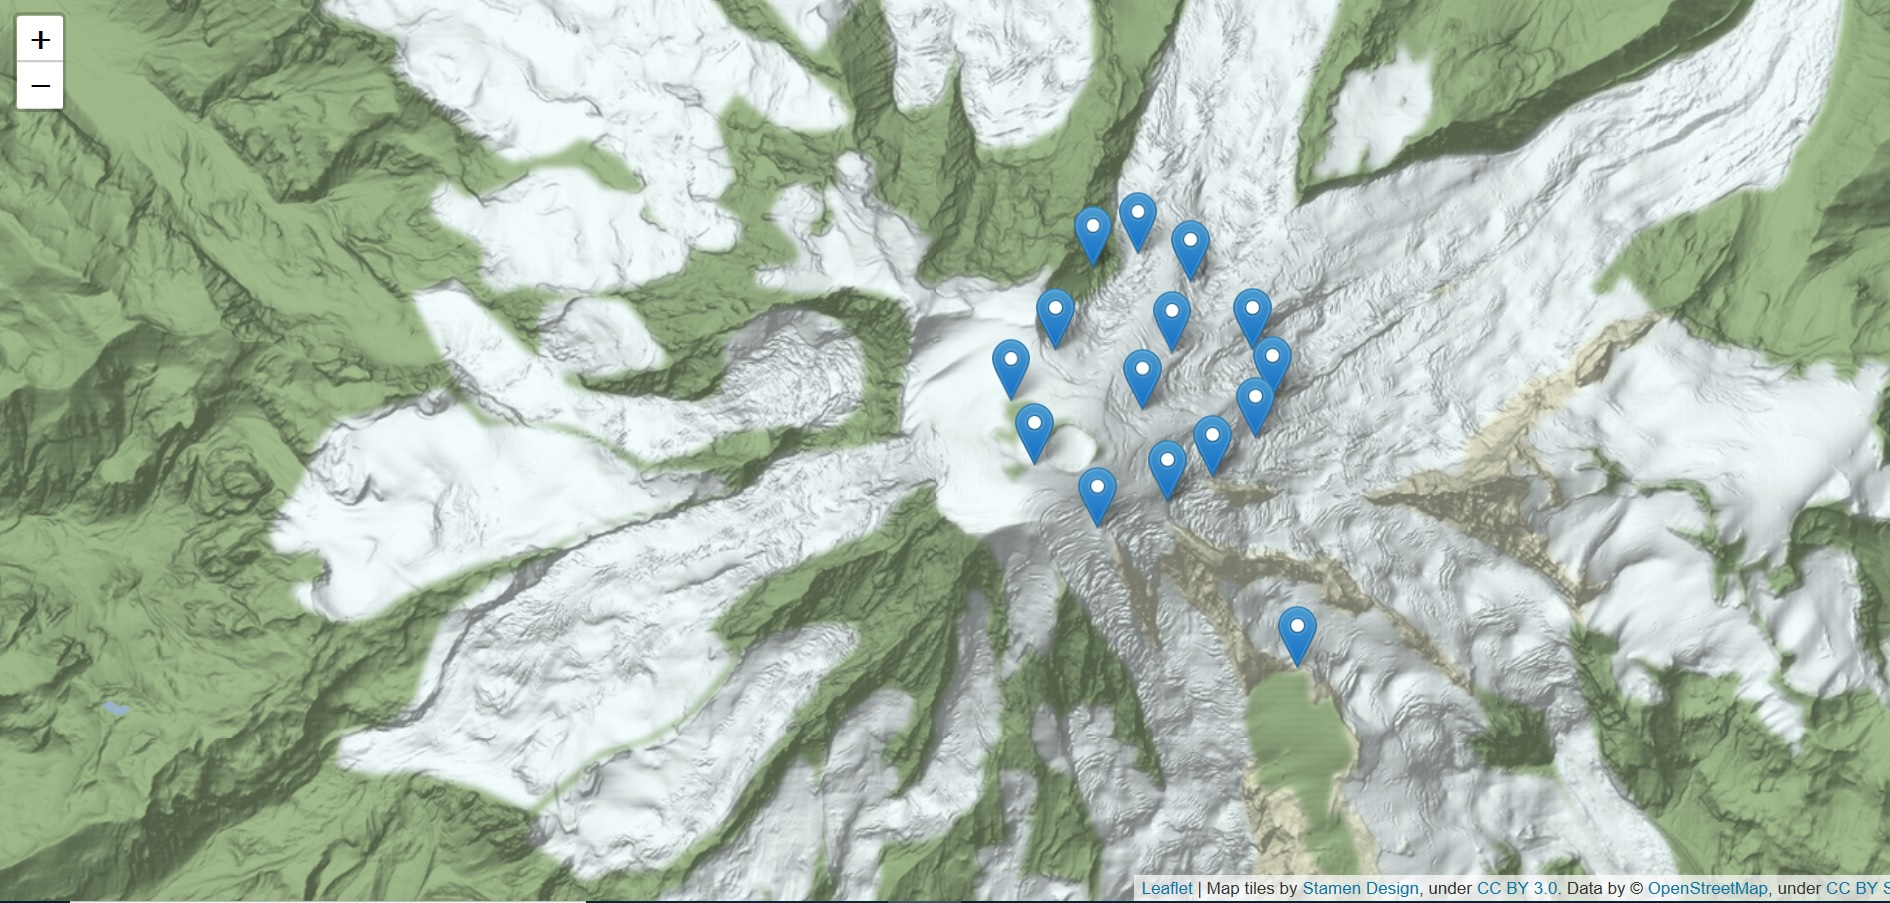

Vincent/Vega and Altair/VegaLite Markersというものも使える。
jsonファイルからグラフが描けるようだが、詳細については調べていない
恐らく、一般的なグラフならマーカとして使用できる。

In [20]:
import os
import json
import requests


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
vis1 = json.loads(requests.get(f'{url}/vis1.json').text)
vis2 = json.loads(requests.get(f'{url}/vis2.json').text)
vis3 = json.loads(requests.get(f'{url}/vis3.json').text)

In [21]:
m = folium.Map(
    location=[46.3014, -123.7390],
    zoom_start=7,
    tiles='Stamen Terrain'
)

folium.Marker(
    location=[47.3489, -124.708],
    popup=folium.Popup(max_width=450).add_child(
        folium.Vega(vis1, width=450, height=250))
).add_to(m)

folium.Marker(
    location=[44.639, -124.5339],
    popup=folium.Popup(max_width=450).add_child(
        folium.Vega(vis2, width=450, height=250))
).add_to(m)

folium.Marker(
    location=[46.216, -124.1280],
    popup=folium.Popup(max_width=450).add_child(
        folium.Vega(vis3, width=450, height=250))
).add_to(m)

m.save('ClickForMarke2.html')


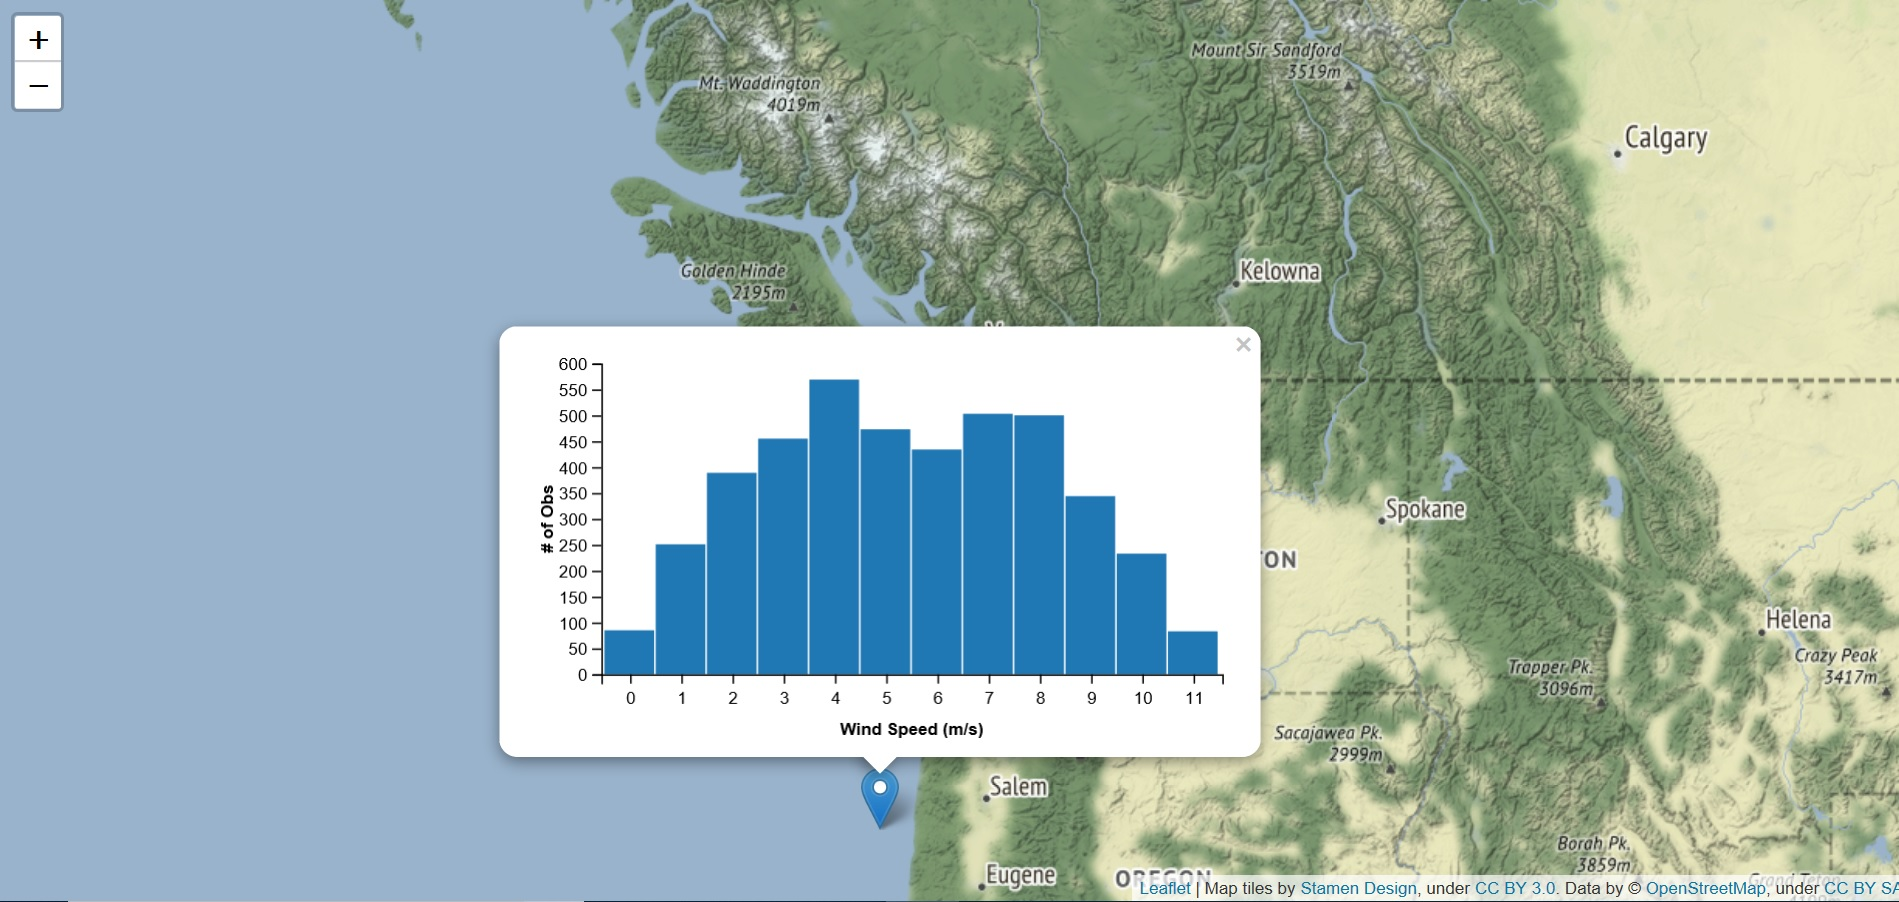

表も表示可能

In [24]:
import pandas as pd

df = pd.DataFrame(data=[['apple', 'oranges'], ['other', 'stuff']], columns=['cats', 'dogs'])

m = folium.Map([43, -100], zoom_start=4)

html = df.to_html(classes='table table-striped table-hover table-condensed table-responsive')

popup = folium.Popup(html)

folium.Marker([30, -100], popup=popup).add_to(m)

m.save(os.path.join('results', 'html_popups.html'))

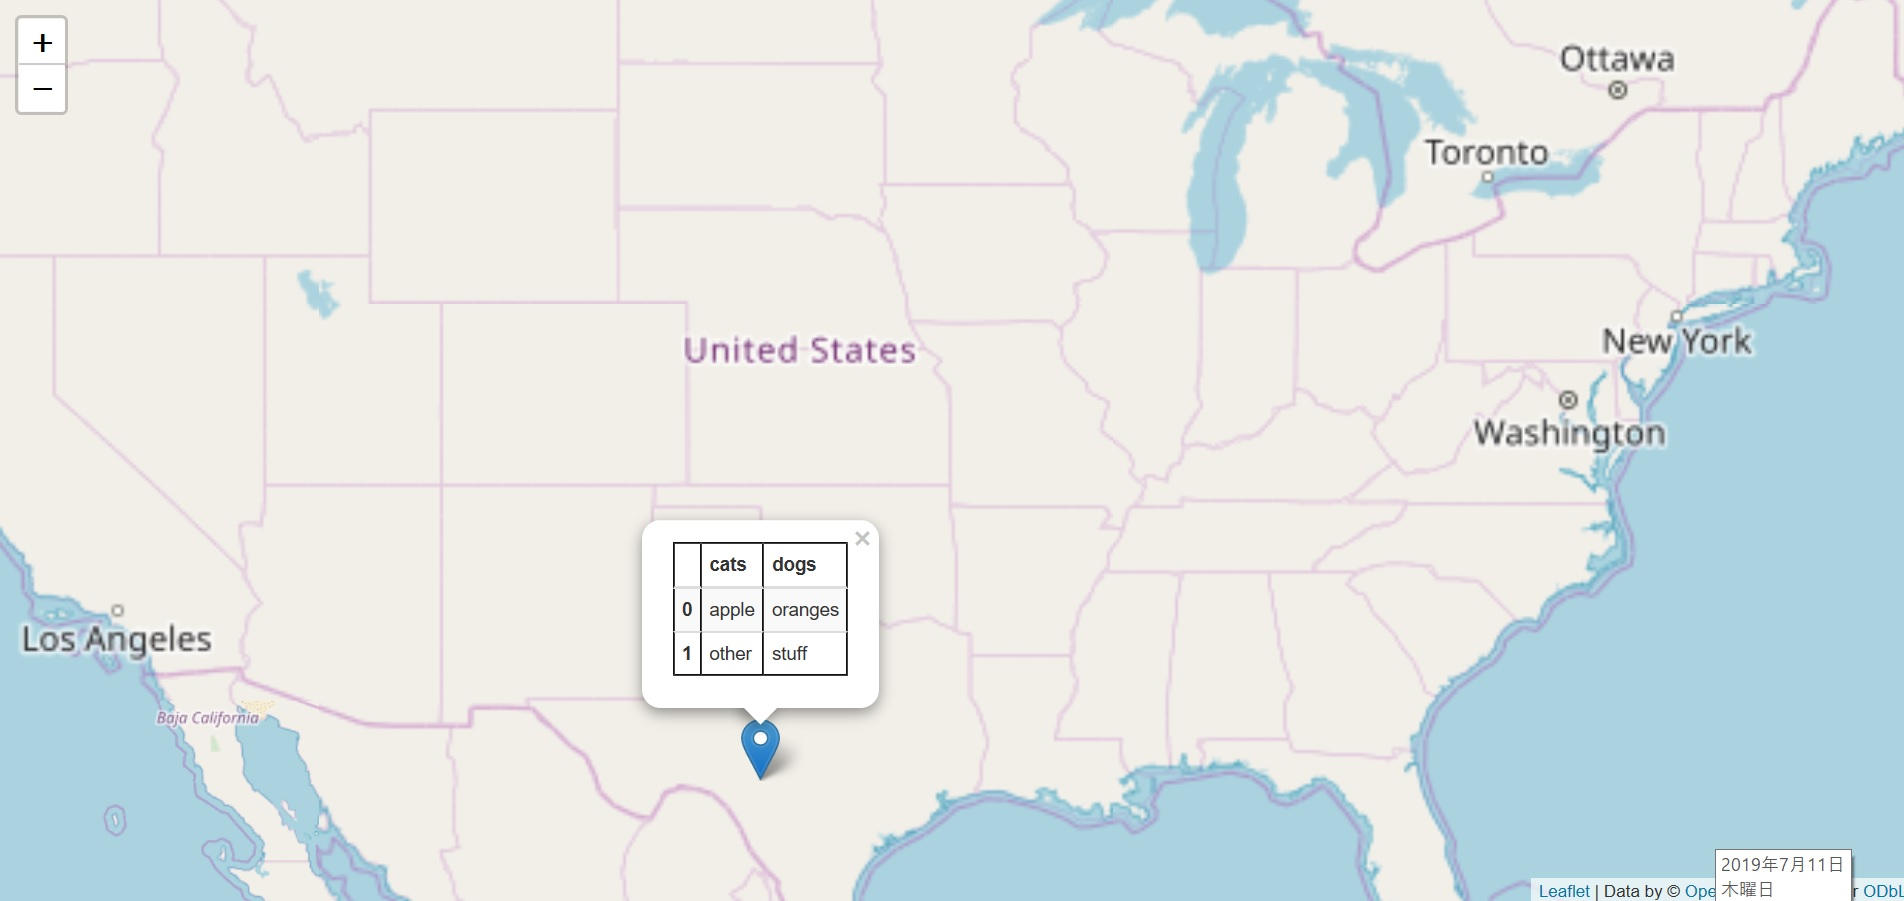

地図オン地図

In [25]:
# Let's create a Figure, with a map inside.
f = branca.element.Figure()
folium.Map([-25, 150], zoom_start=3).add_to(f)

# Let's put the figure into an IFrame.
iframe = branca.element.IFrame(width=500, height=300)
f.add_to(iframe)

# Let's put the IFrame in a Popup
popup = folium.Popup(iframe, max_width=2650)

# Let's create another map.
m = folium.Map([43, -100], zoom_start=4)

# Let's put the Popup on a marker, in the second map.
folium.Marker([30, -100], popup=popup).add_to(m)

# We get a map in a Popup. Not really useful, but powerful.
m.save(os.path.join('results', 'map_popups.html'))

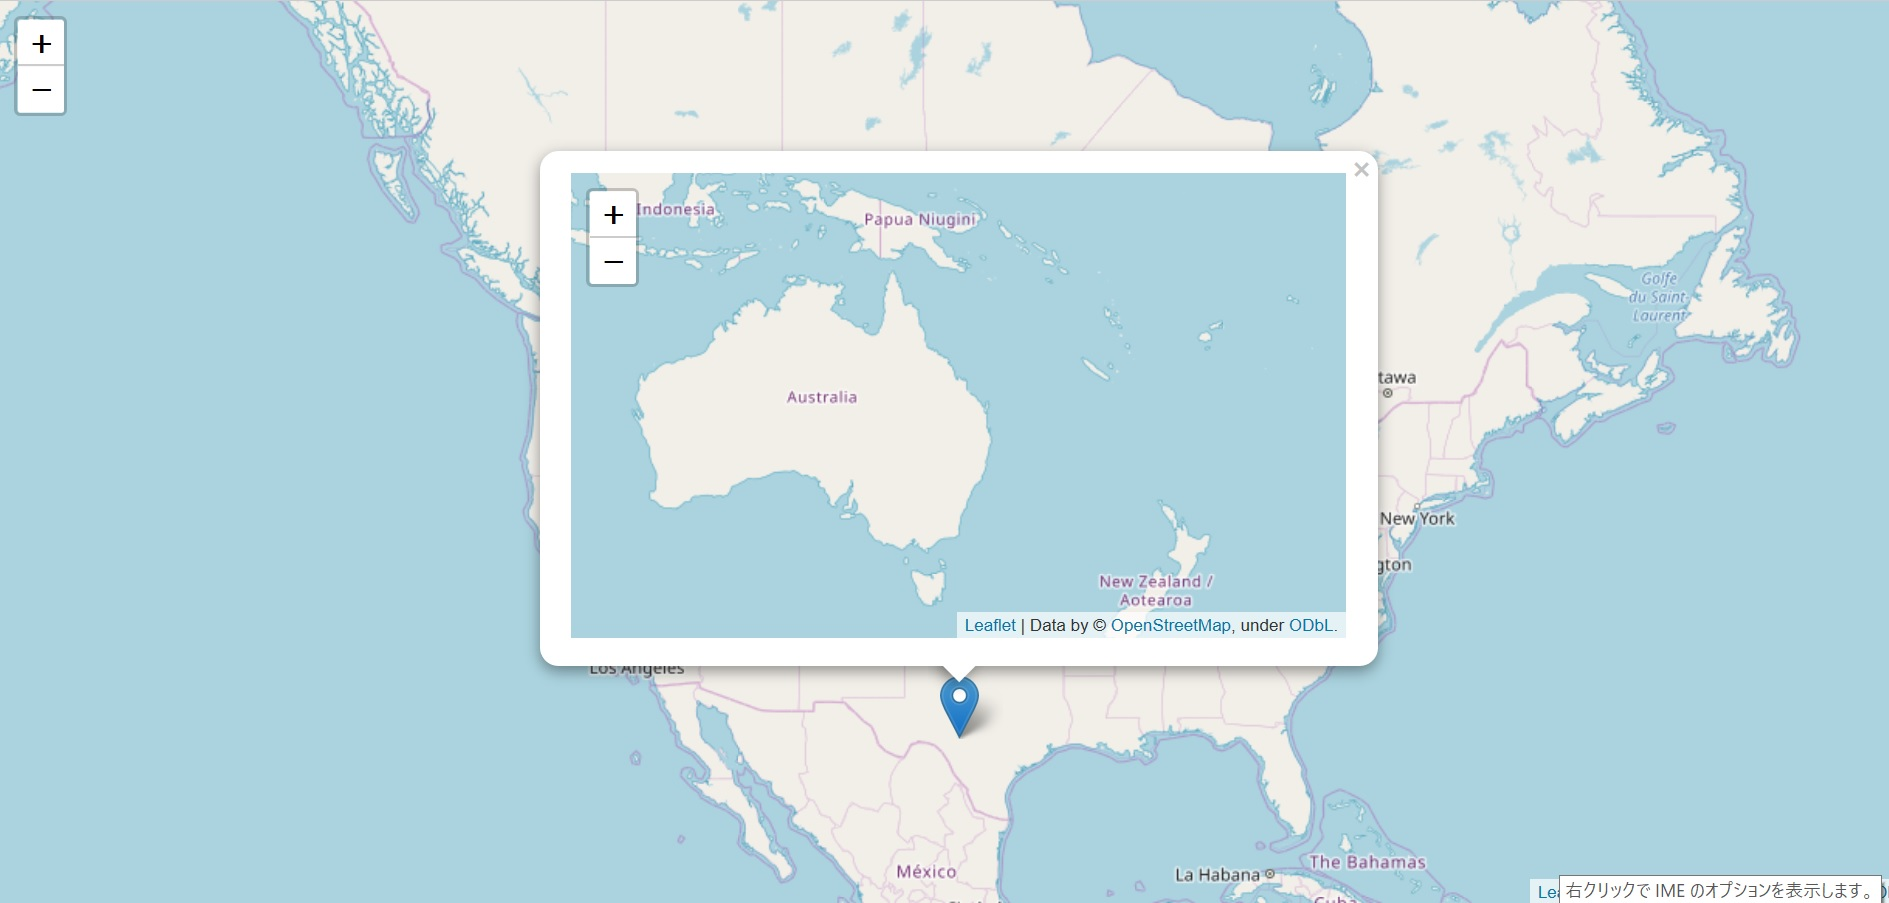

コロプレスの地図。今回はこれを知りたかった。

In [31]:
import pandas as pd


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m.save(os.path.join('results', 'map_popups.html'))

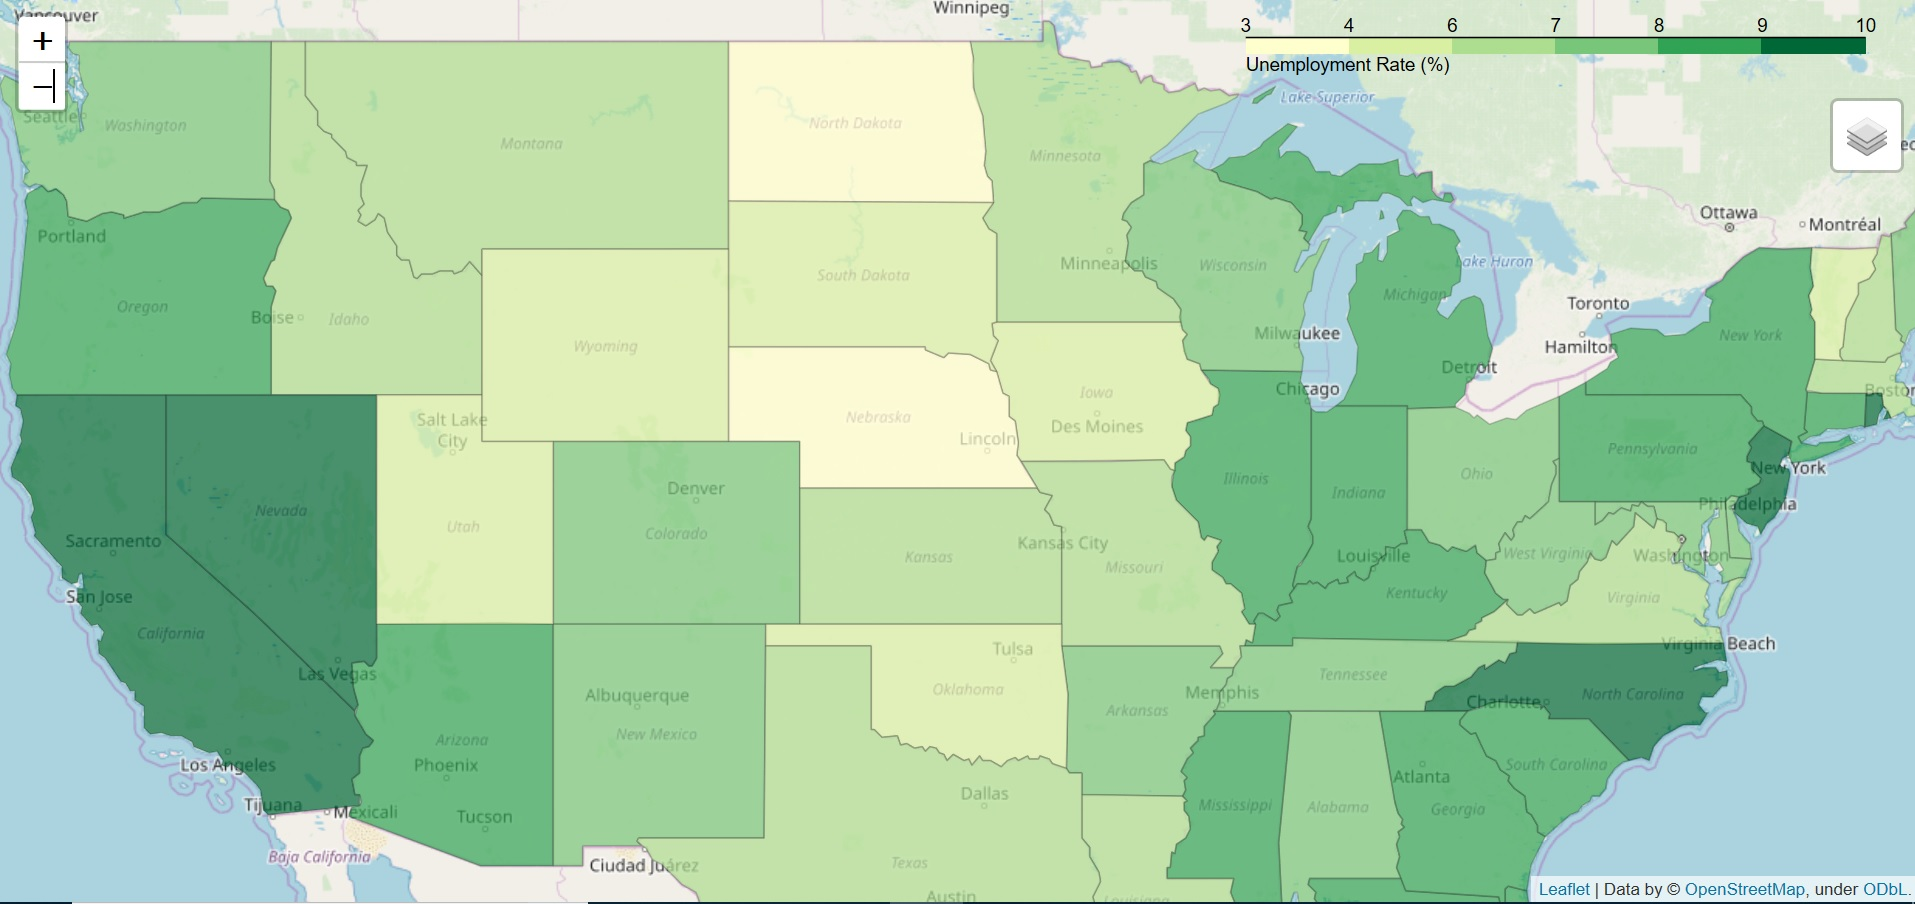